##Import modules

In [ ]:
from google.colab import drive  # Access Google Drive in Google Colab
from google.colab import files  # Upload and download files in Colab
import zipfile  # Handle zip files
import shutil  # File and directory operations, like deletion or moving
import os  # Interact with the operating system
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import glob as gb
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D ,LeakyReLU

##Import dan unzip dataset


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Path to file ZIP in Google Drive
zip_path = '/content/drive/MyDrive/dataset/bananalsd.zip'

Mounted at /content/drive


In [ ]:
# Extract zip file
! unzip '/content/drive/MyDrive/dataset/bananalsd.zip' -d .

Archive:  /content/drive/MyDrive/dataset/bananalsd.zip
  inflating: ./BananaLSD/AugmentedSet/cordana/0_aug.jpeg  
  inflating: ./BananaLSD/AugmentedSet/cordana/100_aug.jpeg  
  inflating: ./BananaLSD/AugmentedSet/cordana/101_aug.jpeg  
  inflating: ./BananaLSD/AugmentedSet/cordana/102_aug.jpeg  
  inflating: ./BananaLSD/AugmentedSet/cordana/103_aug.jpeg  
  inflating: ./BananaLSD/AugmentedSet/cordana/104_aug.jpeg  
  inflating: ./BananaLSD/AugmentedSet/cordana/105_aug.jpeg  
  inflating: ./BananaLSD/AugmentedSet/cordana/106_aug.jpeg  
  inflating: ./BananaLSD/AugmentedSet/cordana/107_aug.jpeg  
  inflating: ./BananaLSD/AugmentedSet/cordana/108_aug.jpeg  
  inflating: ./BananaLSD/AugmentedSet/cordana/109_aug.jpeg  
  inflating: ./BananaLSD/AugmentedSet/cordana/10_aug.jpeg  
  inflating: ./BananaLSD/AugmentedSet/cordana/110_aug.jpeg  
  inflating: ./BananaLSD/AugmentedSet/cordana/111_aug.jpeg  
  inflating: ./BananaLSD/AugmentedSet/cordana/112_aug.jpeg  
  inflating: ./BananaLSD/Augmente

##EDA
di tahap ini kita akan mempelajari pesebaran data yang kita miliki serta mengidentifikasi tahap selanjutnya

In [ ]:
path_banana = '/content/BananaLSD/OriginalSet' #Path ke directory file penyakit pisang
banana_classes = os.listdir(path_banana) #List kelas penyakit pisang
print(banana_classes)

['healthy', 'cordana', 'sigatoka', 'pestalotiopsis']



healthy
Total Images: 129
Resolution of First Image: (224, 224, 3)


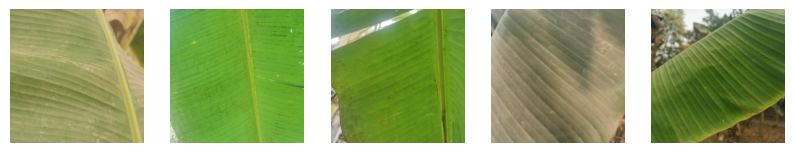


cordana
Total Images: 162
Resolution of First Image: (224, 224, 3)


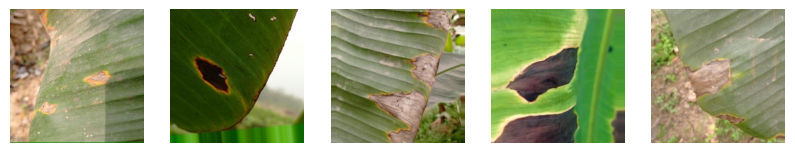


sigatoka
Total Images: 473
Resolution of First Image: (224, 224, 3)


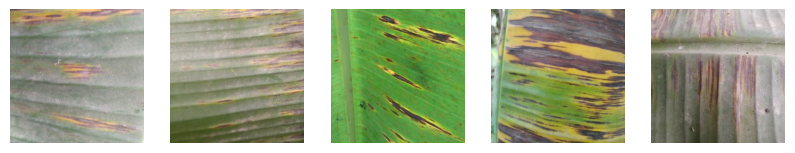


pestalotiopsis
Total Images: 173
Resolution of First Image: (224, 224, 3)


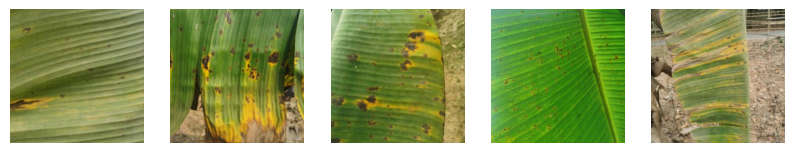

In [ ]:
import matplotlib.image as mpimg
for item in banana_classes:
  print("")
  print(item)
  class_dir = os.path.join(path_banana, item)
  class_images = os.listdir(class_dir)

  # Total images in each classes
  num_images = len(class_images)
  print("Total Images:", num_images)

  # Resolution/size of each first image in class
  img_path = os.path.join(class_dir, class_images[0])
  img = mpimg.imread(img_path)
  image_shape = img.shape
  print("Resolution of First Image:", image_shape)

  # Showing some images
  plt.figure(figsize=(10, 5))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

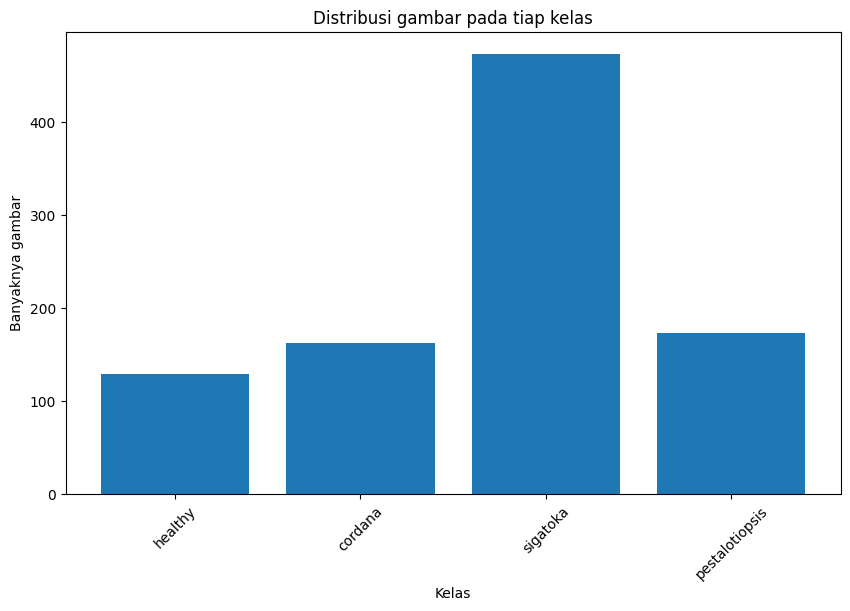

In [ ]:
# Count the number of files in each class directory
class_counts = {}
for cls in banana_classes:
    cls_path = os.path.join(path_banana, cls)
    if os.path.isdir(cls_path):
        class_counts[cls] = len(os.listdir(cls_path))

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Kelas')
plt.ylabel('Banyaknya gambar')
plt.title('Distribusi gambar pada tiap kelas')
plt.xticks(rotation=45)
plt.show()

terlihat bahwa tiap kelas memiliki jumlah data yang sama. Namun, kita membutuhkan lebih banyak gambar. Oleh karena itu kita akan melakukan augmentasi.

# Data Preprocessing

### Image Augmentation

Di tahap ini kita akan menambah jumlah data pada tiap kelas dengan melakukan augmentasi. kita akan buat setiap kelas memiliki lebih dari 1000 data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# augmentasi data cordana
# Define the image data generator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=40,
    horizontal_flip=True,
    fill_mode='constant',     # Change to constant fill mode
    cval=0,
    brightness_range=[0.5, 1.5],  # adjust brightness
    width_shift_range=0.2,          # horizontal shift
    height_shift_range=0.2
)

# Path to your images
input_dir = '/content/BananaLSD/OriginalSet/cordana'  # Change this to your directory path
output_dir = '/content/BananaLSD/OriginalSet/cordana'  # Same as input_dir to save in the same directory

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# List all files in the directory
image_files = [f for f in os.listdir(input_dir) if os.path.isfile(os.path.join(input_dir, f))]

# Number of augmentations to create per image
num_augmentations = 10

# Process each image file
for image_file in image_files:
    # Load the image
    img_path = os.path.join(input_dir, image_file)
    img = load_img(img_path)
    x = img_to_array(img)  # Convert the image to a numpy array
    x = np.expand_dims(x, axis=0)  # Reshape it to (1, height, width, channels)

    # Generate augmentations
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='aug', save_format='jpeg'):
        i += 1
        if i >= num_augmentations:  # Save a fixed number of augmentations per original image
            break

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# augmentasi data healthy
# Define the image data generator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=40,
    horizontal_flip=True,
    fill_mode='constant',     # Change to constant fill mode
    cval=0,
    brightness_range=[0.5, 1.5],  # adjust brightness
    width_shift_range=0.2,          # horizontal shift
    height_shift_range=0.2
)

# Path to your images
input_dir = '/content/BananaLSD/OriginalSet/healthy'  # Change this to your directory path
output_dir = '/content/BananaLSD/OriginalSet/healthy'  # Same as input_dir to save in the same directory

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# List all files in the directory
image_files = [f for f in os.listdir(input_dir) if os.path.isfile(os.path.join(input_dir, f))]

# Number of augmentations to create per image
num_augmentations = 10

# Process each image file
for image_file in image_files:
    # Load the image
    img_path = os.path.join(input_dir, image_file)
    img = load_img(img_path)
    x = img_to_array(img)  # Convert the image to a numpy array
    x = np.expand_dims(x, axis=0)  # Reshape it to (1, height, width, channels)

    # Generate augmentations
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='aug', save_format='jpeg'):
        i += 1
        if i >= num_augmentations:  # Save a fixed number of augmentations per original image
            break

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# augmentasi data pestalotiopsis
# Define the image data generator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=40,
    horizontal_flip=True,
    fill_mode='constant',     # Change to constant fill mode
    cval=0,
    brightness_range=[0.5, 1.5],  # adjust brightness
    width_shift_range=0.2,          # horizontal shift
    height_shift_range=0.2
)

# Path to your images
input_dir = '/content/BananaLSD/OriginalSet/pestalotiopsis'  # Change this to your directory path
output_dir = '/content/BananaLSD/OriginalSet/pestalotiopsis'  # Same as input_dir to save in the same directory

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# List all files in the directory
image_files = [f for f in os.listdir(input_dir) if os.path.isfile(os.path.join(input_dir, f))]

# Number of augmentations to create per image
num_augmentations = 10

# Process each image file
for image_file in image_files:
    # Load the image
    img_path = os.path.join(input_dir, image_file)
    img = load_img(img_path)
    x = img_to_array(img)  # Convert the image to a numpy array
    x = np.expand_dims(x, axis=0)  # Reshape it to (1, height, width, channels)

    # Generate augmentations
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='aug', save_format='jpeg'):
        i += 1
        if i >= num_augmentations:  # Save a fixed number of augmentations per original image
            break

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# augmentasi data sigatoka
# Define the image data generator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=40,
    horizontal_flip=True,
    fill_mode='constant',     # Change to constant fill mode
    cval=0,
    brightness_range=[0.5, 1.5],  # adjust brightness
    width_shift_range=0.2,          # horizontal shift
    height_shift_range=0.2
)

# Path to your images
input_dir = '/content/BananaLSD/OriginalSet/sigatoka'  # Change this to your directory path
output_dir = '/content/BananaLSD/OriginalSet/sigatoka'  # Same as input_dir to save in the same directory

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# List all files in the directory
image_files = [f for f in os.listdir(input_dir) if os.path.isfile(os.path.join(input_dir, f))]

# Number of augmentations to create per image
num_augmentations = 4

# Process each image file
for image_file in image_files:
    # Load the image
    img_path = os.path.join(input_dir, image_file)
    img = load_img(img_path)
    x = img_to_array(img)  # Convert the image to a numpy array
    x = np.expand_dims(x, axis=0)  # Reshape it to (1, height, width, channels)

    # Generate augmentations
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=output_dir, save_prefix='aug', save_format='jpeg'):
        i += 1
        if i >= num_augmentations:  # Save a fixed number of augmentations per original image
            break

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/JpegImagePlugin.py:835: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


mari kita lihat hasil augmentasinya


healthy
Total Images: 1347
Resolution of First Image: (224, 224, 3)


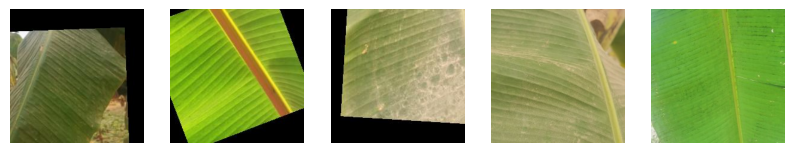


cordana
Total Images: 1661
Resolution of First Image: (224, 224, 3)


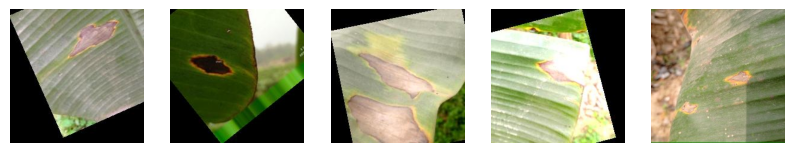


sigatoka
Total Images: 2182
Resolution of First Image: (224, 224, 3)


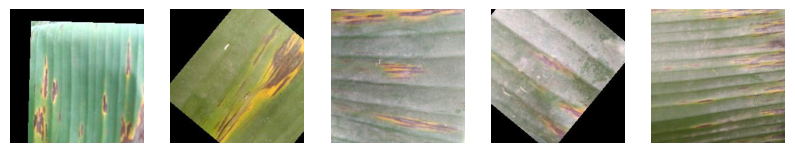


pestalotiopsis
Total Images: 1760
Resolution of First Image: (224, 224, 3)


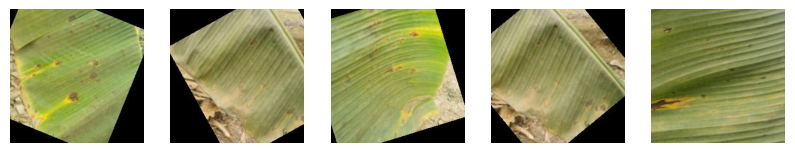

In [ ]:
import matplotlib.image as mpimg
for item in banana_classes:
  print("")
  print(item)
  class_dir = os.path.join(path_banana, item)
  class_images = os.listdir(class_dir)

  # Total images in each classes
  num_images = len(class_images)
  print("Total Images:", num_images)

  # Resolution/size of each first image in class
  img_path = os.path.join(class_dir, class_images[0])
  img = mpimg.imread(img_path)
  image_shape = img.shape
  print("Resolution of First Image:", image_shape)

  # Showing some images
  plt.figure(figsize=(10, 5))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

mari kita buat agar tiap kelas memiliki 1300 data

In [ ]:
import random
def trim_dataset(base_dir, max_files_per_class=1300):
    for class_folder in os.listdir(base_dir):
        class_path = os.path.join(base_dir, class_folder)

        # Ensure we are working with directories only
        if os.path.isdir(class_path):
            # List all files in the class directory
            files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

            # Shuffle the files to ensure randomness
            random.shuffle(files)

            # If there are more files than max_files_per_class, delete the excess
            if len(files) > max_files_per_class:
                files_to_delete = files[max_files_per_class:]
                for file_name in files_to_delete:
                    file_path = os.path.join(class_path, file_name)
                    os.remove(file_path)
                    print(f"Removed: {file_path}")

# Path to the main folder containing class subfolders
base_dir = path_banana  # Change this to your directory path

# Trim the dataset
trim_dataset(base_dir)


Removed: /content/BananaLSD/OriginalSet/healthy/aug_0_8881.jpeg
Removed: /content/BananaLSD/OriginalSet/healthy/aug_0_737.jpeg
Removed: /content/BananaLSD/OriginalSet/healthy/aug_0_7588.jpeg
Removed: /content/BananaLSD/OriginalSet/healthy/34.jpeg
Removed: /content/BananaLSD/OriginalSet/healthy/aug_0_1986.jpeg
Removed: /content/BananaLSD/OriginalSet/healthy/aug_0_1631.jpeg
Removed: /content/BananaLSD/OriginalSet/healthy/aug_0_2491.jpeg
Removed: /content/BananaLSD/OriginalSet/healthy/aug_0_9999.jpeg
Removed: /content/BananaLSD/OriginalSet/healthy/aug_0_6962.jpeg
Removed: /content/BananaLSD/OriginalSet/healthy/aug_0_5073.jpeg
Removed: /content/BananaLSD/OriginalSet/healthy/aug_0_6436.jpeg
Removed: /content/BananaLSD/OriginalSet/healthy/aug_0_396.jpeg
Removed: /content/BananaLSD/OriginalSet/healthy/aug_0_7483.jpeg
Removed: /content/BananaLSD/OriginalSet/healthy/76.jpeg
Removed: /content/BananaLSD/OriginalSet/healthy/112.jpeg
Removed: /content/BananaLSD/OriginalSet/healthy/aug_0_5487.jpeg
R

In [ ]:
# Verify the result
for class_folder in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_folder)
    if os.path.isdir(class_path):
        num_files = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
        print(f"Class '{class_folder}' now has {num_files} images.")


Class 'healthy' now has 1300 images.
Class 'cordana' now has 1300 images.
Class 'sigatoka' now has 1300 images.
Class 'pestalotiopsis' now has 1300 images.


mari kita lihat hasil augmentasinya


healthy
Total Images: 1300
Resolution of First Image: (224, 224, 3)


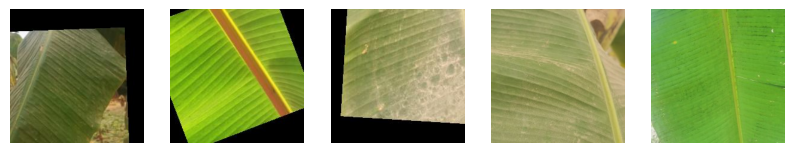


cordana
Total Images: 1300
Resolution of First Image: (224, 224, 3)


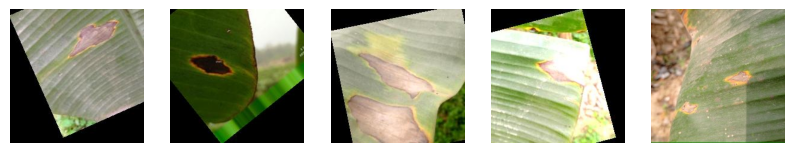


sigatoka
Total Images: 1300
Resolution of First Image: (224, 224, 3)


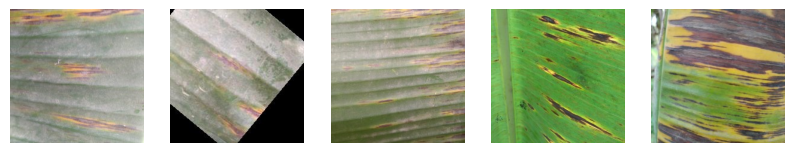


pestalotiopsis
Total Images: 1300
Resolution of First Image: (224, 224, 3)


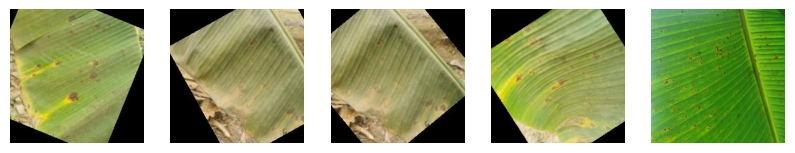

In [ ]:
import matplotlib.image as mpimg
for item in banana_classes:
  print("")
  print(item)
  class_dir = os.path.join(path_banana, item)
  class_images = os.listdir(class_dir)

  # Total images in each classes
  num_images = len(class_images)
  print("Total Images:", num_images)

  # Resolution/size of each first image in class
  img_path = os.path.join(class_dir, class_images[0])
  img = mpimg.imread(img_path)
  image_shape = img.shape
  print("Resolution of First Image:", image_shape)

  # Showing some images
  plt.figure(figsize=(10, 5))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

#Data Preprocessing

##Labelling dan normalisasi data menggunakan ImageDataGenerator

In [ ]:
pip install split-folders


Bagi data dengan komposisi 0.7 : 0.15 : 0.15 untuk data training : validasi : test

In [ ]:
import splitfolders

# Define paths
input_folder = path_banana
output_folder = '/content/BananaLSD/working'

# Split the dataset into train and validation
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.7, 0.15, 0.15))

Copying files: 5200 files [00:00, 7700.39 files/s]


In [ ]:
path_banana_train = '/content/BananaLSD/working/train' #Path ke directory file penyakit jagung
path_banana_val = '/content/BananaLSD/working/val'
path_banana_test = '/content/BananaLSD/working/test'
banana_classes_train = os.listdir(path_banana_train) #List kelas penyakit jagung
banana_classes_val = os.listdir(path_banana_val) #List kelas penyakit jagung
banana_classes_test = os.listdir(path_banana_test) #List kelas penyakit jagung

print(banana_classes_train)
print(banana_classes_val)
print(banana_classes_test)

['healthy', 'cordana', 'sigatoka', 'pestalotiopsis']
['healthy', 'cordana', 'sigatoka', 'pestalotiopsis']
['healthy', 'cordana', 'sigatoka', 'pestalotiopsis']


##Data training


healthy
Total Images: 909
Resolution of First Image: (224, 224, 3)


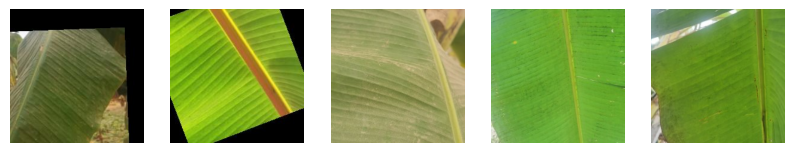


cordana
Total Images: 909
Resolution of First Image: (224, 224, 3)


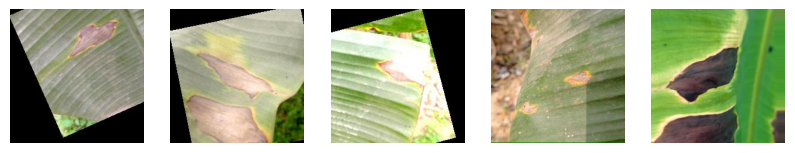


sigatoka
Total Images: 909
Resolution of First Image: (224, 224, 3)


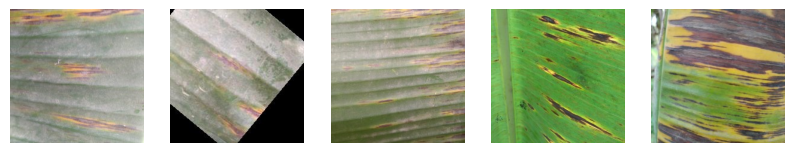


pestalotiopsis
Total Images: 909
Resolution of First Image: (224, 224, 3)


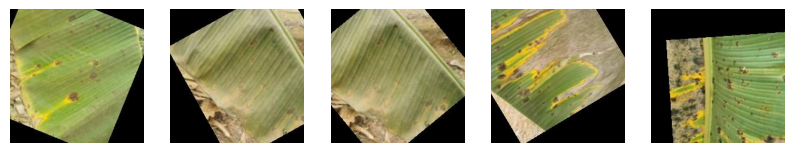

In [ ]:
import matplotlib.image as mpimg
for item in banana_classes_train:
  print("")
  print(item)
  class_dir = os.path.join(path_banana_train, item)
  class_images = os.listdir(class_dir)

  # Total images in each classes
  num_images = len(class_images)
  print("Total Images:", num_images)

  # Resolution/size of each first image in class
  img_path = os.path.join(class_dir, class_images[0])
  img = mpimg.imread(img_path)
  image_shape = img.shape
  print("Resolution of First Image:", image_shape)

  # Showing some images
  plt.figure(figsize=(10, 5))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

##Data validation


healthy
Total Images: 195
Resolution of First Image: (224, 224, 3)


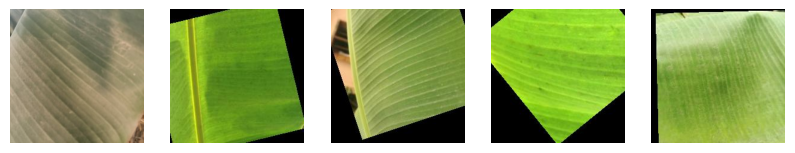


cordana
Total Images: 195
Resolution of First Image: (224, 224, 3)


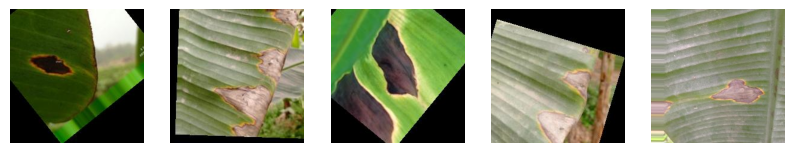


sigatoka
Total Images: 195
Resolution of First Image: (224, 224, 3)


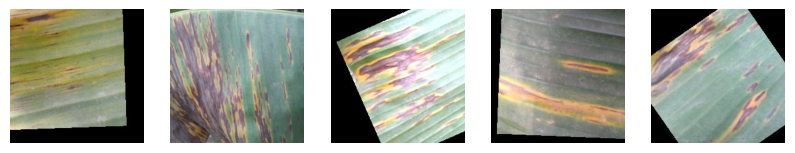


pestalotiopsis
Total Images: 195
Resolution of First Image: (224, 224, 3)


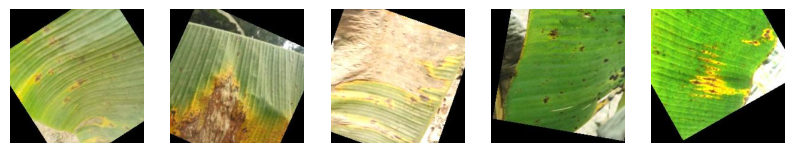

In [ ]:
import matplotlib.image as mpimg
for item in banana_classes_val:
  print("")
  print(item)
  class_dir = os.path.join(path_banana_val, item)
  class_images = os.listdir(class_dir)

  # Total images in each classes
  num_images = len(class_images)
  print("Total Images:", num_images)

  # Resolution/size of each first image in class
  img_path = os.path.join(class_dir, class_images[0])
  img = mpimg.imread(img_path)
  image_shape = img.shape
  print("Resolution of First Image:", image_shape)

  # Showing some images
  plt.figure(figsize=(10, 5))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

##Data test


healthy
Total Images: 196
Resolution of First Image: (224, 224, 3)


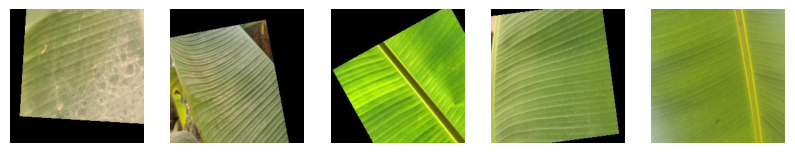


cordana
Total Images: 196
Resolution of First Image: (224, 224, 3)


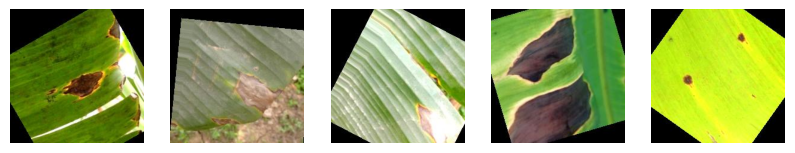


sigatoka
Total Images: 196
Resolution of First Image: (224, 224, 3)


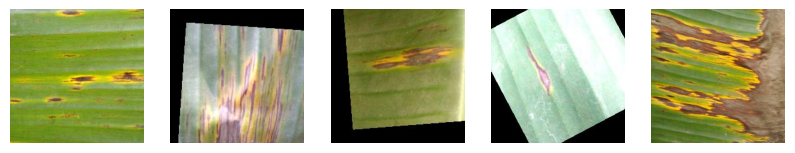


pestalotiopsis
Total Images: 196
Resolution of First Image: (224, 224, 3)


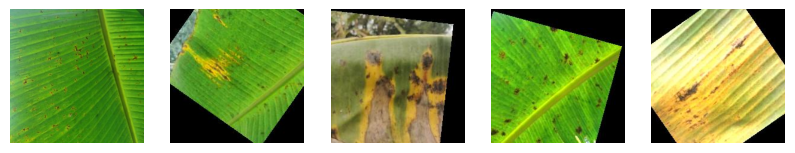

In [ ]:
import matplotlib.image as mpimg
for item in banana_classes_test:
  print("")
  print(item)
  class_dir = os.path.join(path_banana_test, item)
  class_images = os.listdir(class_dir)

  # Total images in each classes
  num_images = len(class_images)
  print("Total Images:", num_images)

  # Resolution/size of each first image in class
  img_path = os.path.join(class_dir, class_images[0])
  img = mpimg.imread(img_path)
  image_shape = img.shape
  print("Resolution of First Image:", image_shape)

  # Showing some images
  plt.figure(figsize=(10, 5))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

In [ ]:
#training and validation directories
train_dir = path_banana_train
validation_dir = path_banana_val
test_dir = path_banana_test

In [ ]:
#import training data
train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator=  train_datagen.flow_from_directory(
        train_dir,
        target_size = (150,150),
        batch_size = 32,
        class_mode = 'categorical'
    )

#import validation data
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical'
    )

#import test data
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical'
    )

Found 3636 images belonging to 4 classes.
Found 780 images belonging to 4 classes.
Found 784 images belonging to 4 classes.


mari kita periksa data yang telah diberi label

Training Data


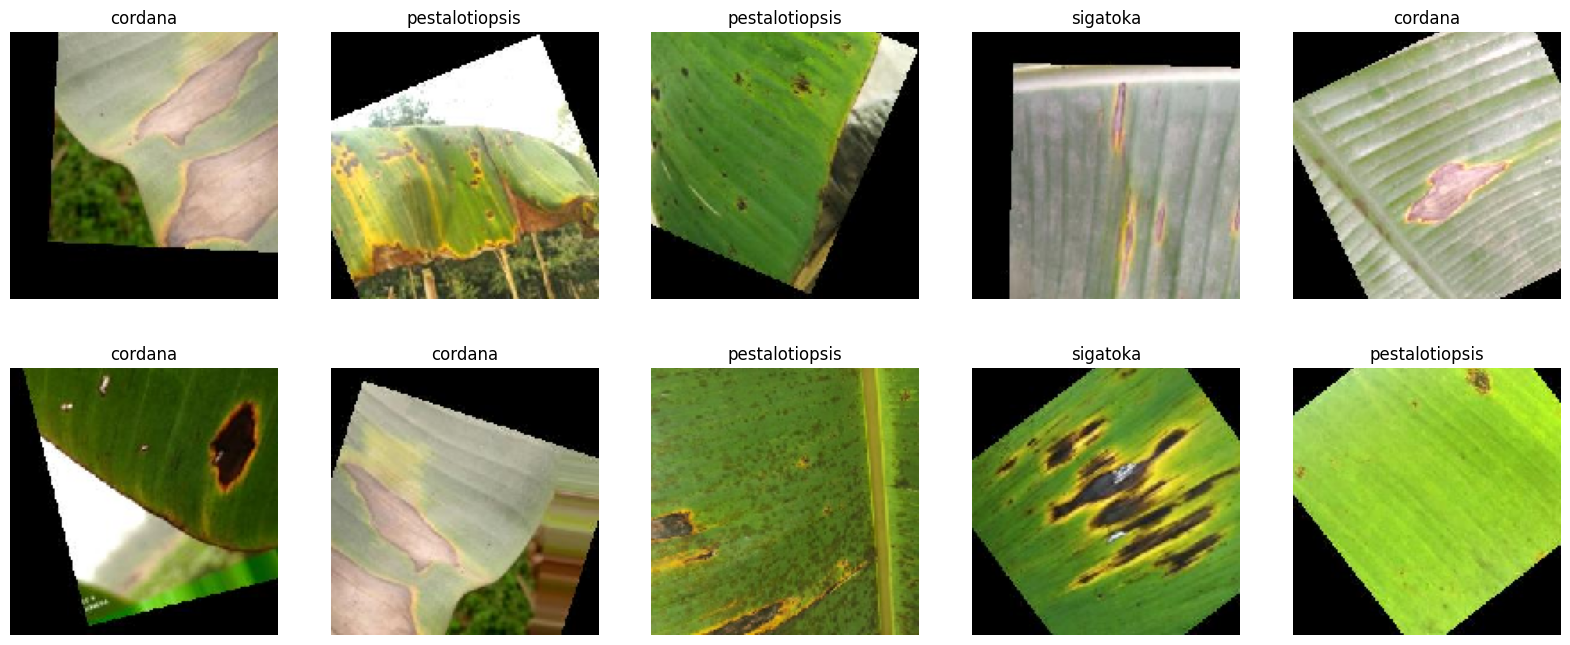

Validation Data


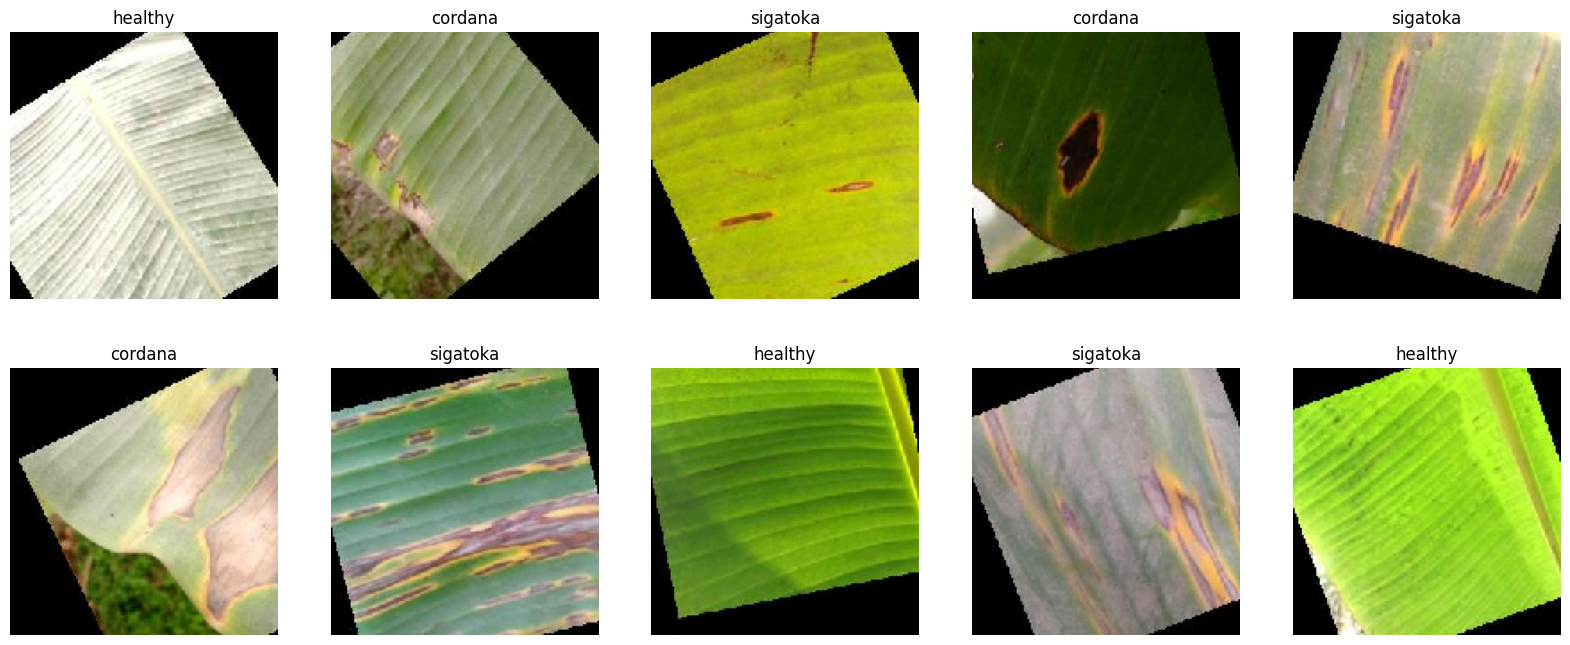

Test Data


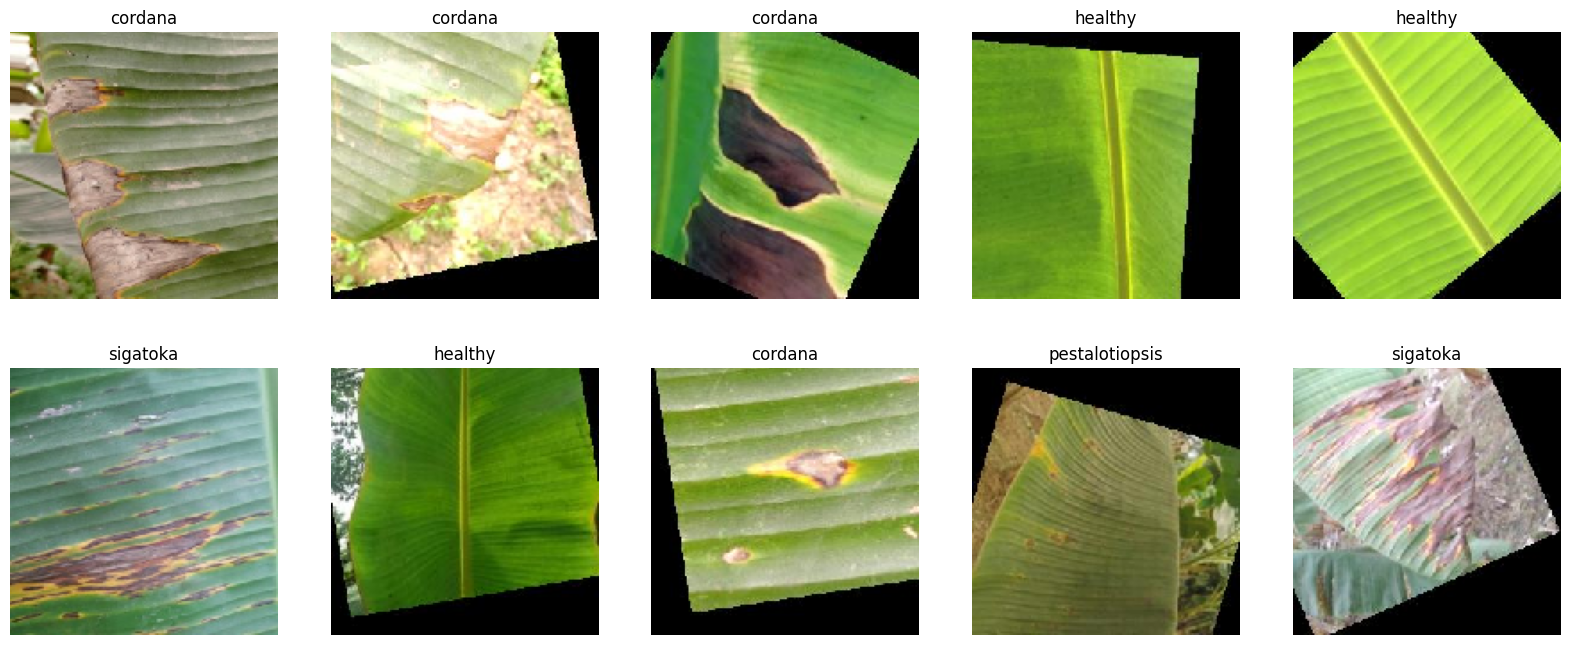

In [ ]:
# Get class indices and invert the dictionary to get class labels
class_indices = train_generator.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

# Function to plot images with their labels
def plot_images(images, labels, idx_to_class, num_images=10):
    plt.figure(figsize=(20, 8))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        label_idx = np.argmax(labels[i])  # Get the index of the highest probability class
        plt.title(idx_to_class[label_idx])
    plt.show()

# Print a batch of training data
images, labels = next(train_generator)
print("Training Data")
plot_images(images, labels, idx_to_class)

# Print a batch of validation data
images, labels = next(validation_generator)
print("Validation Data")
plot_images(images, labels, idx_to_class)

# Print a batch of validation data
images, labels = next(test_generator)
print("Test Data")
plot_images(images, labels, idx_to_class)


###Training

selanjutnya, kita akan training data menggunakan model inceptionV3

In [25]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import urllib.request

In [60]:
inceptionv3 = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
urllib.request.urlretrieve( inceptionv3, 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')
local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model =  InceptionV3(input_shape=(150, 150, 3),
                                 include_top=False, weights=None) # YOUR CODE HERE

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

last_layer =  pre_trained_model.get_layer('mixed7') # YOUR CODE HERE
last_output = last_layer.output


In [61]:
#last layers
x = Flatten()(last_output)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = layers.Dense(4, activation='softmax')(x)

In [62]:
#pre-trained model
model = Model(pre_trained_model.input, x)

#compile model
model.compile(optimizer=RMSprop(lr=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['acc'])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_282 (Conv2D)         (None, 74, 74, 32)           864       ['input_4[0][0]']             
                                                                                                  
 batch_normalization_282 (B  (None, 74, 74, 32)           96        ['conv2d_282[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_282 (Activation  (None, 74, 74, 32)           0         ['batch_normalization_28

In [63]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc') > 0.93 and logs.get('val_acc') > 0.90):
                print("\n Accuracy is more than 95%, stopping...")
                self.model.stop_training = True

customCallback = myCallback()

In [64]:
history = model.fit(
        train_generator,
        validation_data=validation_generator,  # Added validation data here
        epochs=30,
        verbose=1,
        steps_per_epoch=40,
        callbacks=[customCallback]
        )

Epoch 1/30
40/40 [==============================] - 7s 102ms/step - loss: 1.2922 - acc: 0.5970 - val_loss: 0.4930 - val_acc: 0.8141
Epoch 2/30
40/40 [==============================] - 4s 95ms/step - loss: 0.6429 - acc: 0.7397 - val_loss: 0.4662 - val_acc: 0.8564
Epoch 3/30
40/40 [==============================] - 3s 66ms/step - loss: 0.4355 - acc: 0.8454 - val_loss: 0.2469 - val_acc: 0.9231
Epoch 4/30
40/40 [==============================] - 3s 65ms/step - loss: 0.4023 - acc: 0.8470 - val_loss: 0.2023 - val_acc: 0.9346
Epoch 5/30
40/40 [==============================] - 3s 66ms/step - loss: 0.3404 - acc: 0.8758 - val_loss: 0.1858 - val_acc: 0.9346
Epoch 6/30
40/40 [==============================] - 3s 71ms/step - loss: 0.2980 - acc: 0.8844 - val_loss: 0.2023 - val_acc: 0.9269
Epoch 7/30
40/40 [==============================] - 4s 94ms/step - loss: 0.3082 - acc: 0.8859 - val_loss: 0.2240 - val_acc: 0.9244
Epoch 8/30
40/40 [==============================] - 3s 72ms/step - loss: 0.2510 - 

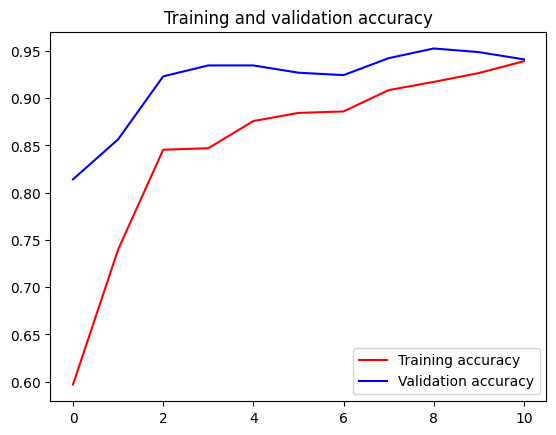

<Figure size 640x480 with 0 Axes>

In [65]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

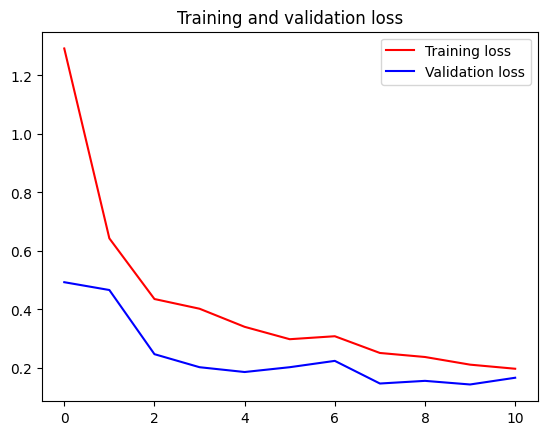

<Figure size 640x480 with 0 Axes>

In [66]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [67]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("test Accuracy:", test_accuracy)

25/25 [==============================] - 2s 64ms/step - loss: 0.1612 - acc: 0.9439
test Accuracy: 0.9438775777816772


In [69]:
model.save("banana_inception_model.h5")

In [70]:
model_load = tf.keras.models.load_model('/content/banana_inception_model.h5')

Saving images (2).jpg to images (2) (3).jpg
1/1 [==============================] - 0s 37ms/step

Predict:
pestalotiopsis

Probablity:
cordana : 0.01%
sigatoka : 0.00%
pestalotiopsis : 99.42%
healthy : 0.57%


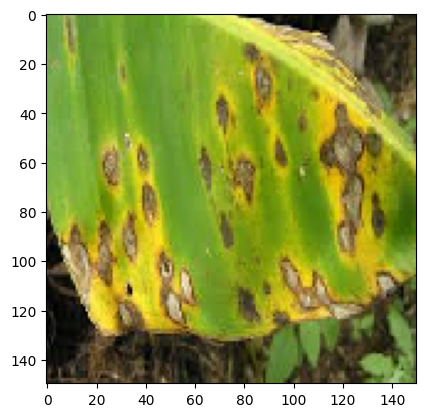

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files  # Only if you're using Google Colab or a similar environment

# get user image input
labels = ['cordana', 'sigatoka', 'pestalotiopsis', 'healthy']

uploaded = files.upload()

for path in uploaded.keys():
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  images /= 255

  classes = model_load.predict(images, batch_size=32)
  predicted_class_indices=np.argmax(classes)


print("\nPredict:")
if predicted_class_indices == 0:
  print('cordana')
elif predicted_class_indices == 1:
  print('sigatoka')
elif predicted_class_indices == 2:
  print('pestalotiopsis')
elif predicted_class_indices == 3:
  print('healthy')


print("\nProbablity:")
for idx, val in enumerate(labels):
  print("{} : {:.2f}%".format(val, classes[0][idx] * 100))